# ОИАД. Лабораторная работа №2
## Король Иван, 11б группа
## Входные данные
Датасет: **datasets/students_simple.csv**
Выбираются 2 слобкика данных по формулам:
1) $N \% 5$
2) $N^2 \% 5 + 5$
,где $N$ - номер в списке

$N = 11$
1) $N \% 5 = 1 -- mass$
2) $N^2 \% 5 + 5 = 6 -- bmi$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

df = pd.read_csv('../../datasets/students_simple.csv')
df

,height,mass,income,iq,pages,age,bmi,work_exp,friends,test_time
0,159,45,430,95,24,20,3.533,26,5,8.5
1,160,61,640,115,32,25,2.623,63,7,6.2
2,161,56,610,111,24,28,2.875,94,10,6.8
3,162,48,330,97,24,19,3.375,16,4,12.0
4,162,54,420,105,60,23,3.000,49,2,7.5
5,164,58,290,98,16,20,2.828,14,6,10.0
6,166,51,480,109,90,26,3.255,78,9,7.2
7,169,62,610,120,24,19,2.726,10,5,4.2
8,170,70,840,122,48,30,2.429,130,10,3.5
9,170,72,330,92,24,20,2.361,20,3,9.5


In [2]:
x = df['mass'].values  # вес
y = df['bmi'].values     # индекс массы тела

mean_x = np.mean(x)
mean_y = np.mean(y)

sigma_x = np.std(x)
sigma_y = np.std(y)

print(f"Выбранные переменные:")
print(f"X (вес): среднее = {mean_x:.2f}, стандартное отклонение = {sigma_x:.2f}")
print(f"Y (индекс массы тела): среднее = {mean_y:.2f}, стандартное отклонение = {sigma_y:.2f}")
print(f"Размер выборки: {len(x)}")


Выбранные переменные:
X (вес): среднее = 67.45, стандартное отклонение = 13.28
Y (индекс массы тела): среднее = 2.61, стандартное отклонение = 0.43
Размер выборки: 20


# 1. Расчет корреляций
## а\) Корреляция Фехнера

In [3]:
# Корреляция Фехнера
def fechner_correlation(x, y):

    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    signs_x = np.sign(x - mean_x)
    signs_y = np.sign(y - mean_y)
    
    matches = np.sum(signs_x * signs_y > 0)
    mismatches = np.sum(signs_x * signs_y < 0)
    
    K = (matches - mismatches) / len(x)
    
    return K


fechner_corr = fechner_correlation(x, y)

print(f"=============================\n")
print(f"Корреляция Фехнера: {fechner_corr:.4f}")
print(f"\n=============================")


Корреляция Фехнера: -0.9000



## б\) Корреляция Пирсона и доверительный интервал

In [4]:
# Корреляция Пирсона
def pearson_corretlation(x,y):
    pearson_corr, pearson_p = pearsonr(x, y)

    n = len(x)

    z = 0.5 * np.log((1 + pearson_corr) / (1 - pearson_corr))
    se = 1 / np.sqrt(n - 3)
    z_lower = z - 1.96 * se
    z_upper = z + 1.96 * se

    ci_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
    ci_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)

    return pearson_corr, pearson_p, ci_lower, ci_upper

pearson_corr, pearson_p, ci_lower, ci_upper = pearson_corretlation(x, y)
print(f"\n=============================\n")
print(f"Корреляция Пирсона: {pearson_corr:.4f}")
print(f"\n=============================\n")
print(f"p-value: {pearson_p}")
print(f"\n=============================\n")
print(f"95% доверительный интервал: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"\n=============================\n")
if (pearson_p < 0.05):
    print(f"Отвергаем гипотезу о независимости признаков при уровне значимости 0.05")
else:
    print(f"Не отвергаем гипотезу о независимости признаков при уровне значимости 0.05")
print(f"\n=============================\n")



Корреляция Пирсона: -0.9606


p-value: 1.8792005370883774e-11


95% доверительный интервал: [-0.9846, -0.9012]


Отвергаем гипотезу о независимости признаков при уровне значимости 0.05




## в\) Корреляция Спирмена

In [5]:
# Корреляция Спирмена
spearman_corr, spearman_p = spearmanr(x, y)
print(f"\n=============================\n")
print(f"Корреляция Спирмена: {spearman_corr:.4f}")
print(f"\n=============================\n")
print(f"p-value: {spearman_p}")
print(f"\n=============================\n")

if (spearman_p < 0.05):
    print(f"Отвергаем гипотезу о независимости признаков при уровне значимости 0.05")
else:
    print(f"Не отвергаем гипотезу о независимости признаков при уровне значимости 0.05")
print(f"\n=============================\n")





Корреляция Спирмена: -0.9849


p-value: 3.572163563796866e-15


Отвергаем гипотезу о независимости признаков при уровне значимости 0.05




## г\) Корреляция Кенделла

In [6]:
# Корреляция Кенделла
kendall_corr, kendall_p = kendalltau(x, y)
print(f"\n=============================\n")
print(f"Корреляция Кенделла: {kendall_corr:.4f}")
print(f"\n=============================\n")
print(f"p-value: {kendall_p}")
print(f"\n=============================\n")

if (kendall_p < 0.05):
    print(f"Отвергаем гипотезу о независимости признаков при уровне значимости 0.05")
else:
    print(f"Не отвергаем гипотезу о независимости признаков при уровне значимости 0.05")
print(f"\n=============================\n")



Корреляция Кенделла: -0.9390


p-value: 8.835298875333122e-09


Отвергаем гипотезу о независимости признаков при уровне значимости 0.05




# Вывод:
## Все вычисленные коэффициенты корреляции очень близки к -1. Это означает, что между признаками веса и индекса массы тела существует сильная отрицательная зависимость.

# 2. Визуализация

/var/folders/s8/5pf30scd5rj2s1z64_c4m0pw0000gn/T/ipykernel_4617/2518368860.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


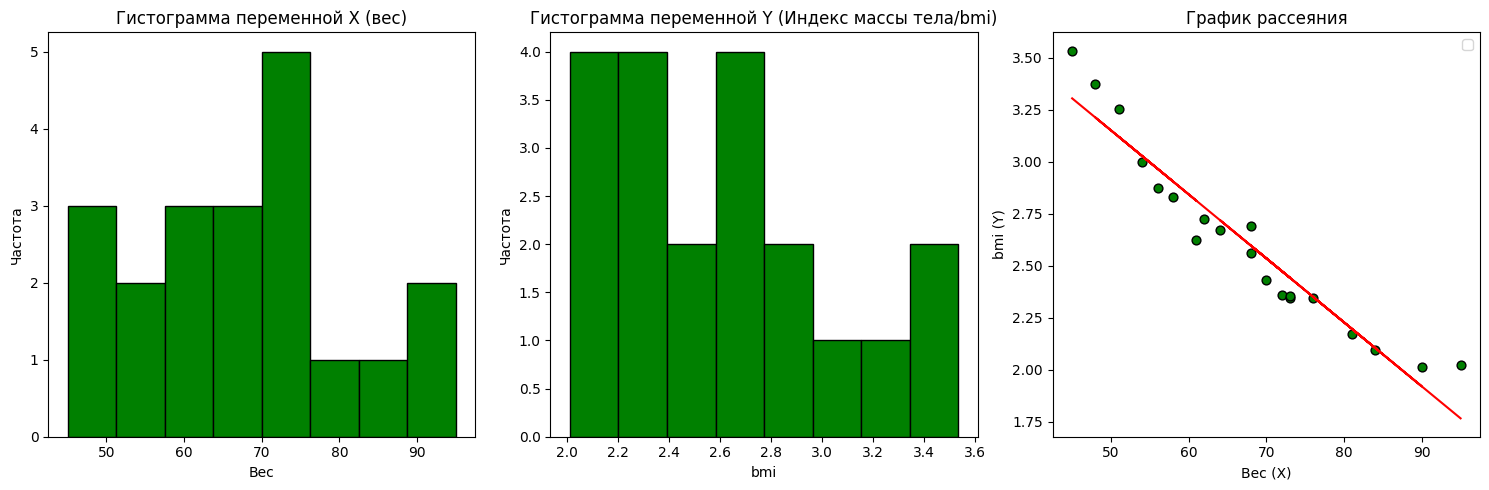

In [7]:

plt.figure(figsize=(15, 5))
bins = 8
# Гистограммы
plt.subplot(1, 3, 1)
plt.hist(x, bins=bins, color='green', edgecolor='black')
plt.title('Гистограмма переменной X (вес)')
plt.xlabel('Вес')
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
plt.hist(y, bins=bins, color='green', edgecolor='black')
plt.title('Гистограмма переменной Y (Индекс массы тела/bmi)')
plt.xlabel('bmi')
plt.ylabel('Частота')

# График рассеяния
plt.subplot(1, 3, 3)
plt.scatter(x, y, s=40, color='green', edgecolors='black', linewidth=1)
plt.title('График рассеяния')
plt.xlabel('Вес (X)')
plt.ylabel('bmi (Y)')

# Линия регрессии
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r-')
plt.legend()

plt.tight_layout()
plt.show()


# Вывод:
## По гистограммам сложно опеределить распределение данных, нельзя сказать, что распределения близки к нормальным. Однако по графику рассеяния можно просмотреть обратную зависимость между индексом массы тела и весом. Можно предложить, что построенные далее модели регрессии будут достаточно точно отражать зависимость.

# 3. Уравнения регрессии

## 3.1. Линейная -- $y=w_1 x + w_0$

In [8]:
def linear_regression(x, y):

    X = x.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    
    w0 = model.intercept_
    w1 = model.coef_[0]
    
    # Предсказания
    y_pred = model.predict(X)
    
    # Коэффициент детерминации
    r2 = r2_score(y, y_pred)
    
    return w0, w1, y_pred, r2


w0_linear, w1_linear, y_pred_linear, r2_linear = linear_regression(x, y)

print("1. Линейная регрессия:")
print(f"\n=============================\n")
print(f"Уравнение: y = {w1_linear:.4f}*x + {w0_linear:.4f}")
print(f"\n=============================\n")
print(f"w0 = {w0_linear:.4f}")
print(f"w1 = {w1_linear:.4f}")
print(f"\n=============================\n")
print("Коэффициент детерминации:\n")
print(f"R² = {r2_linear:.4f}")
print(f"\n=============================\n")


1. Линейная регрессия:


Уравнение: y = -0.0308*x + 4.6881


w0 = 4.6881
w1 = -0.0308


Коэффициент детерминации:

R² = 0.9228




## 3.2. Квадратичная -- $y = w_2 x^2 + w_1 x + w_0$

In [9]:
def quadratic_regression(x, y):

    # Создаем полиномиальные признаки
    poly_features = PolynomialFeatures(degree=2)
    X_poly = poly_features.fit_transform(x.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    w0 = model.intercept_
    w1 = model.coef_[1]  # коэффициент при x
    w2 = model.coef_[2]  # коэффициент при x^2
    
    # Предсказания
    y_pred = model.predict(X_poly)
    
    # Коэффициент детерминации
    r2 = r2_score(y, y_pred)
    
    return w0, w1, w2, y_pred, r2

# Строим квадратичную модель
w0_quad, w1_quad, w2_quad, y_pred_quad, r2_quad = quadratic_regression(x, y)

print("2. Квадратичная регрессия:")
print(f"\n=============================\n")
print(f"Уравнение: y = {w2_quad:.4f}*x² + {w1_quad:.4f}*x + {w0_quad:.4f}")
print(f"\n=============================\n")
print(f"w0 = {w0_quad:.4f}")
print(f"w1 = {w1_quad:.4f}")
print(f"w2 = {w2_quad:.4f}")
print(f"\n=============================\n")
print("Коэффициент детерминации:\n")
print(f"R² = {r2_quad:.4f}")
print(f"\n=============================\n")


2. Квадратичная регрессия:


Уравнение: y = 0.0005*x² + -0.0990*x + 6.9596


w0 = 6.9596
w1 = -0.0990
w2 = 0.0005


Коэффициент детерминации:

R² = 0.9779




## 3.3. Гиперболическая -- $y = \frac{w_1}{x} + w_0$

In [10]:
def hyperbolic_regression(x, y):

    if np.any(x <= 0):
        print("Ошибка: для гиперболической регрессии все значения x должны быть положительными")
        return None, None, None, None
    
    # Создаем новую переменную z = 1/x
    z = 1 / x
    
    # Строим линейную регрессию y = w1*z + w0
    X = z.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    
    w0 = model.intercept_
    w1 = model.coef_[0]
    
    # Предсказания
    y_pred = model.predict(X)
    
    # Коэффициент детерминации
    r2 = r2_score(y, y_pred)
    
    return w0, w1, y_pred, r2

w0_hyp, w1_hyp, y_pred_hyp, r2_hyp = hyperbolic_regression(x, y)

if w0_hyp is not None:
    print("3. Гиперболическая регрессия:")
    print(f"\n=============================\n")
    print(f"Уравнение: y = {w1_hyp:.4f}/x + {w0_hyp:.4f}")
    print(f"\n=============================\n")
    print(f"w0 = {w0_hyp:.4f}")
    print(f"w1 = {w1_hyp:.4f}")
    print(f"\n=============================\n")
    print("Коэффициент детерминации:\n")
    print(f"R² = {r2_hyp:.4f}")
    print(f"\n=============================\n")
else:
    print("3. Гиперболическая регрессия не может быть построена (отрицательные значения x)")
    r2_hyp = -1


3. Гиперболическая регрессия:


Уравнение: y = 135.2427/x + 0.5275


w0 = 0.5275
w1 = 135.2427


Коэффициент детерминации:

R² = 0.9791




## 3.4. Показательная, $y = w_1^x \cdot w_0$

In [11]:
def exponential_regression(x, y):

    if np.any(y <= 0):
        print("Ошибка: для показательной регрессии все значения y должны быть положительными")
        return None, None, None, None
    
    # Логарифмируем: ln(y) = x*ln(w1) + ln(w0)
    # Это линейная регрессия: ln(y) = a*x + b, где a = ln(w1), b = ln(w0)
    log_y = np.log(y)
    

    X = x.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, log_y)
    
    a = model.coef_[0]  # ln(w1)
    b = model.intercept_  # ln(w0)
    
    w1 = np.exp(a)
    w0 = np.exp(b)
    
    log_y_pred = model.predict(X)
    y_pred = np.exp(log_y_pred)
    
    r2 = r2_score(y, y_pred)
    
    return w0, w1, y_pred, r2

w0_exp, w1_exp, y_pred_exp, r2_exp = exponential_regression(x, y)

if w0_exp is not None:
    print("4. Показательная регрессия:")
    print(f"\n=============================\n")
    print(f"Уравнение: y = {w1_exp:.4f}^x * {w0_exp:.4f}")
    print(f"\n=============================\n")
    print(f"w0 = {w0_exp:.4f}")
    print(f"w1 = {w1_exp:.4f}")
    print(f"\n=============================\n")
    print("Коэффициент детерминации:\n")
    print(f"   R² = {r2_exp:.4f}")
    print(f"\n=============================\n")
else:
    print("4. Показательная регрессия не может быть построена (отрицательные значения y)")
    r2_exp = -1


4. Показательная регрессия:


Уравнение: y = 0.9884^x * 5.6857


w0 = 5.6857
w1 = 0.9884


Коэффициент детерминации:

   R² = 0.9542




## 3. Графики уравнений регрессии

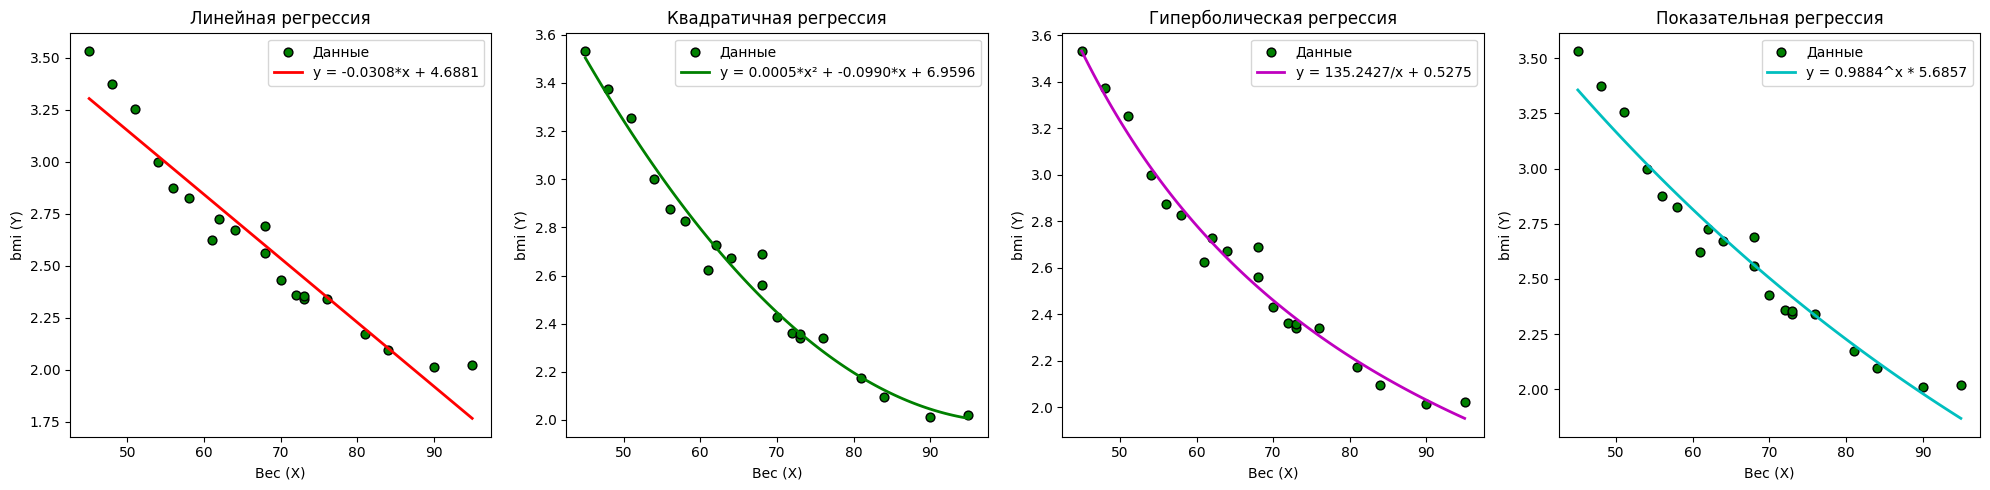

In [12]:
plt.figure(figsize=(20, 5))

x_sorted = np.sort(x)
x_range = np.linspace(x.min(), x.max(), 100)

# 1. Линейная регрессия
plt.subplot(1, 4, 1)
plt.scatter(x, y, s=40, color='green', edgecolors='black', linewidth=1, label='Данные')

y_linear_range = w1_linear * x_range + w0_linear
plt.plot(x_range, y_linear_range, 'r-', linewidth=2, label=f'y = {w1_linear:.4f}*x + {w0_linear:.4f}')
plt.title('Линейная регрессия')
plt.xlabel('Вес (X)')
plt.ylabel('bmi (Y)')
plt.legend()

# 2. Квадратичная регрессия
plt.subplot(1, 4, 2)
plt.scatter(x, y, s=40, color='green', edgecolors='black', linewidth=1, label='Данные')
y_quad_range = w2_quad * x_range**2 + w1_quad * x_range + w0_quad
plt.plot(x_range, y_quad_range, 'g-', linewidth=2, label=f'y = {w2_quad:.4f}*x² + {w1_quad:.4f}*x + {w0_quad:.4f}')
plt.title('Квадратичная регрессия')
plt.xlabel('Вес (X)')
plt.ylabel('bmi (Y)')
plt.legend()

# 3. Гиперболическая регрессия
plt.subplot(1, 4, 3)
plt.scatter(x, y, s=40, color='green', edgecolors='black', linewidth=1, label='Данные')
if w0_hyp is not None:
    y_hyp_range = w1_hyp / x_range + w0_hyp
    plt.plot(x_range, y_hyp_range, 'm-', linewidth=2, label=f'y = {w1_hyp:.4f}/x + {w0_hyp:.4f}')
    plt.title('Гиперболическая регрессия')
    plt.xlabel('Вес (X)')
    plt.ylabel('bmi (Y)')
    plt.legend()
else:
    plt.title('Гиперболическая регрессия не применима')


# 4. Показательная регрессия
plt.subplot(1, 4, 4)
plt.scatter(x, y, s=40, color='green', edgecolors='black', linewidth=1, label='Данные')
if w0_exp is not None:
    y_exp_range = w1_exp**x_range * w0_exp
    plt.plot(x_range, y_exp_range, 'c-', linewidth=2, label=f'y = {w1_exp:.4f}^x * {w0_exp:.4f}')
    plt.title('Показательная регрессия')
    plt.xlabel('Вес (X)')
    plt.ylabel('bmi (Y)')
    plt.legend()
else:
    plt.title('Показательная регрессия не применима')


plt.tight_layout()
plt.show()


## 3. Определение наилучшей и наихудшей модели

In [13]:
print("Сравнение моделей по коэффициенту детерминации R²:\n")
print(f"1. Линейная регрессия: R² = {r2_linear:.4f}\n")
print(f"2. Квадратичная регрессия: R² = {r2_quad:.4f}\n")
if w0_hyp is not None:
    print(f"3. Гиперболическая регрессия: R² = {r2_hyp:.4f}\n")
else:
    print(f"3. Гиперболическая регрессия не применима\n")
if w0_exp is not None:
    print(f"4. Показательная регрессия: R² = {r2_exp:.4f}\n")
else:
    print(f"4. Показательная регрессия не применима\n")

models_r2 = {
    'Линейная': r2_linear,
    'Квадратичная': r2_quad,
    'Гиперболическая': r2_hyp,
    'Показательная': r2_exp
}

valid_models = {k: v for k, v in models_r2.items() if v >= 0}

best_model = max(valid_models, key=valid_models.get)
worst_model = min(valid_models, key=valid_models.get)

print(f"\nЛучшая модель: {best_model} (R² = {valid_models[best_model]:.4f})")
print(f"Худшая модель: {worst_model} (R² = {valid_models[worst_model]:.4f})")


Сравнение моделей по коэффициенту детерминации R²:

1. Линейная регрессия: R² = 0.9228

2. Квадратичная регрессия: R² = 0.9779

3. Гиперболическая регрессия: R² = 0.9791

4. Показательная регрессия: R² = 0.9542


Лучшая модель: Гиперболическая (R² = 0.9791)
Худшая модель: Линейная (R² = 0.9228)


# Вывод:
## Как видно по построенным графикам и значениям коэффициентов детерминации наиболее точными моделями получились квадратичная и гиперболическая. Наименее точная - линейная.

# 4. Проверка значимости уравнения регрессии критерием Фишера

In [14]:
def fisher_test(r2, n, k, alpha=0.05):

    if r2 >= 1 or r2 < 0:
        return None, None, None, None
    
    df1 = k - 1
    df2 = n - k

    # Статистика Фишера
    F_stat = (r2 / (1 - r2)) * (df2 / df1)
    
    F_critical = stats.f.ppf(1 - alpha, df1, df2)
    
    p_value = 1 - stats.f.cdf(F_stat, df1, df2)
    
    is_significant = F_stat > F_critical
    
    return F_stat, F_critical, p_value, is_significant

print("4. Проверка значимости уравнений регрессии критерием Фишера:\n")

n = len(x)
alpha = 0.05
k_best = 3 if best_model == 'Квадратичная' else 2
k_worst = 3 if worst_model == 'Квадратичная' else 2

# Тестируем лучшую модель
F_stat, F_critical, p_value, is_sign = fisher_test(valid_models[best_model], n, k_best, alpha)
print(f"Лучшая модель ({best_model}):")
print(f"  F-статистика: {F_stat:.4f}")
print(f"  Критическое значение F({k_best-1}, {n-k_best}): {F_critical:.4f}")
print(f"  P-value: {p_value:}")
print(f"  {'Отвергаем' if is_sign else 'Не отвергаем'} гипотезу о незначимости уравнения регрессии (α = {alpha})\n")
print("="*30)
print()
# Тестируем худшую модель
F_stat, F_critical, p_value, is_sign = fisher_test(valid_models[worst_model], n, k_worst, alpha)
print(f"Худшая модель ({worst_model}):")
print(f"  F-статистика: {F_stat:.4f}")
print(f"  Критическое значение F({k_worst-1}, {n-k_worst}): {F_critical:.4f}")
print(f"  P-значение: {p_value}")
print(f"  {'Отвергаем' if is_sign else 'Не отвергаем'} гипотезу о незначимости уравнения регрессии (α = {alpha})\n")



4. Проверка значимости уравнений регрессии критерием Фишера:

Лучшая модель (Гиперболическая):
  F-статистика: 844.5955
  Критическое значение F(1, 18): 4.4139
  P-value: 1.1102230246251565e-16
  Отвергаем гипотезу о незначимости уравнения регрессии (α = 0.05)


Худшая модель (Линейная):
  F-статистика: 215.0718
  Критическое значение F(1, 18): 4.4139
  P-значение: 1.8791967981712787e-11
  Отвергаем гипотезу о незначимости уравнения регрессии (α = 0.05)

